# Store Sales Prediction

### Data Pre-Processing

#### import packages

In [104]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics
from mlxtend.evaluate import bias_variance_decomp
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [225]:
df = pd.read_csv('MP_1_DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [3]:
print('Shape of data: ', df.shape)

Shape of data:  (14204, 12)


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


###### 

#### Analysis before handling missing values

###### EDA of numerical features

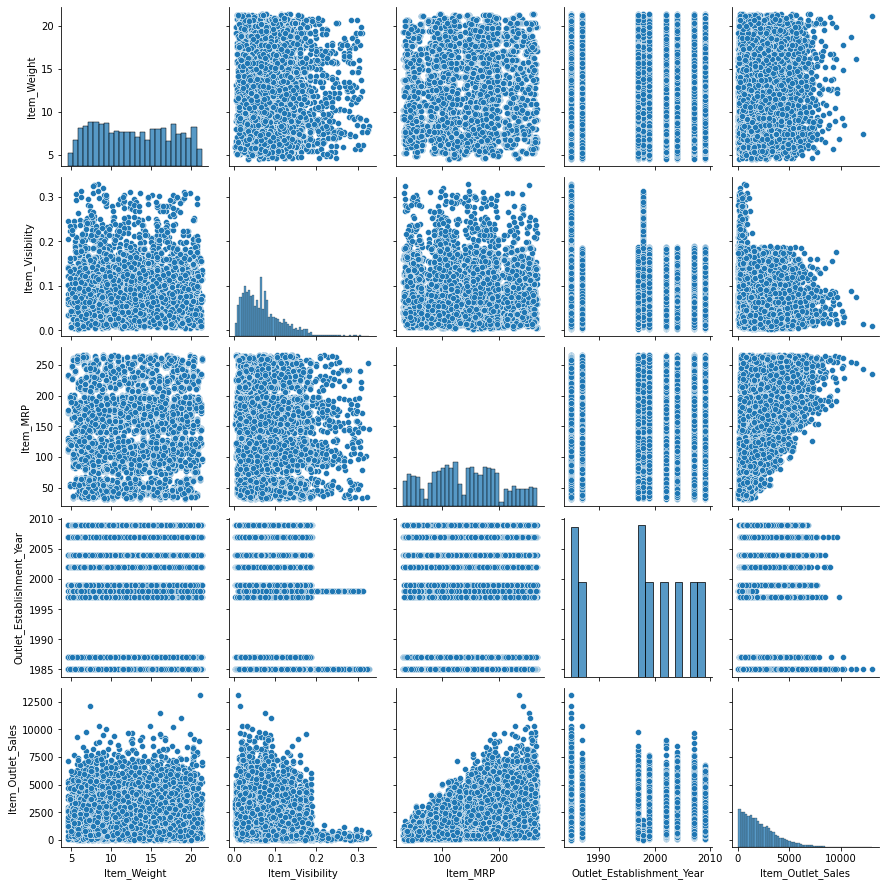

In [7]:
sb.pairplot(df);

In [8]:
df.skew()

Item_Weight                  0.100417
Item_Visibility              1.302807
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.177531
dtype: float64

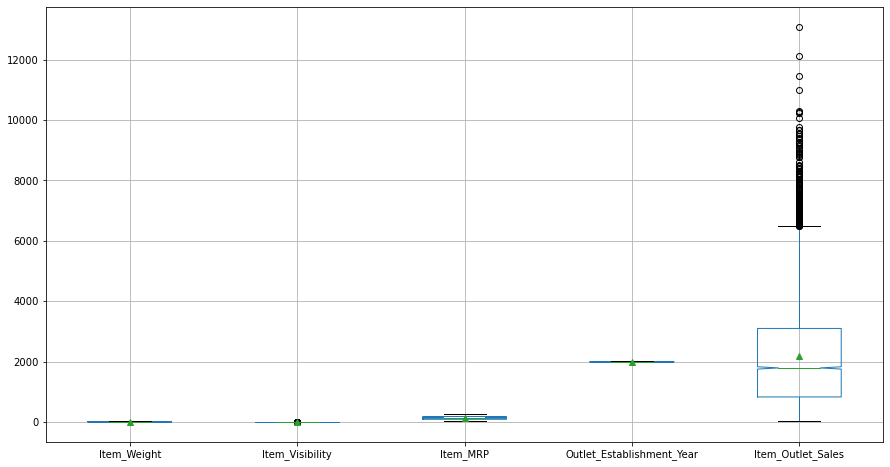

In [9]:
_,ax = plt.subplots(figsize = (15, 8))
df.boxplot(notch = True, showmeans = True);

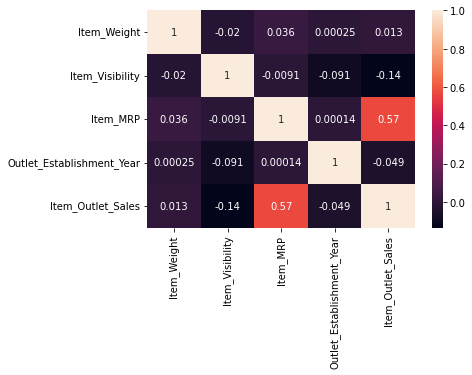

In [10]:
sb.heatmap(df.corr(), annot = True);

###### EDA of non-numerical features

In [11]:
Item_Fat_Content = df['Item_Fat_Content'].value_counts() 
Item_Type = df['Item_Type'].value_counts() 
Outlet_Identifier = df['Outlet_Identifier'].value_counts() 
Outlet_Size = df['Outlet_Size'].value_counts() 
Outlet_Location_Type = df['Outlet_Location_Type'].value_counts() 
Outlet_Type = df['Outlet_Type'].value_counts() 
# Item_Identifier = df['Item_Identifier'].value_counts()

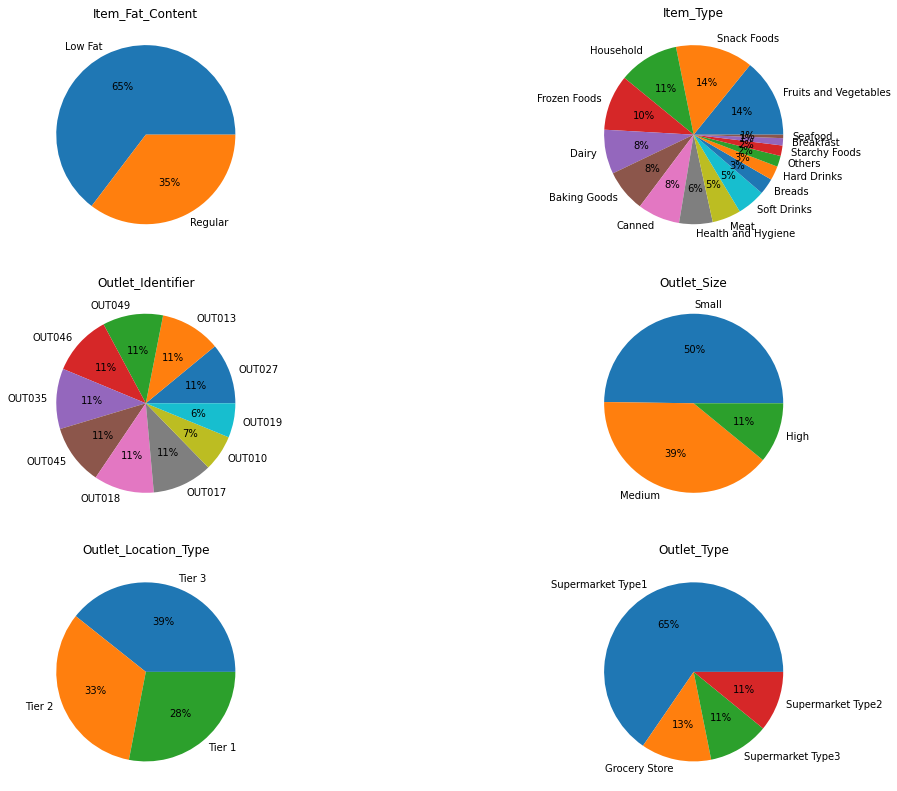

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, subplot_kw={'aspect':'equal'}, figsize = (18,14))

# plot each pie chart in a separate subplot
ax1.pie(
    Item_Fat_Content,
    labels = Item_Fat_Content.index,
    autopct = '%.f%%' 
)
ax1.set_title('Item_Fat_Content')
# ax1.legend()

ax2.pie(
    Item_Type,
    labels = Item_Type.index,
    autopct = '%.f%%' 
)
ax2.set_title('Item_Type')

ax3.pie(
    Outlet_Identifier,
    labels = Outlet_Identifier.index,
    autopct = '%.f%%'
)
ax3.set_title('Outlet_Identifier')

ax4.pie(
    Outlet_Size,
    labels = Outlet_Size.index,
    autopct = '%.f%%' 
)
ax4.set_title('Outlet_Size')

ax5.pie(
    Outlet_Location_Type,
    labels = Outlet_Location_Type.index,
    autopct = '%.f%%' 
)
ax5.set_title('Outlet_Location_Type')

ax6.pie(
    Outlet_Type,
    labels = Outlet_Type.index,
    autopct = '%.f%%' 
)
ax6.set_title('Outlet_Type')
plt.show();

#### Handling missing values

In [13]:
df[df.isnull().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,NaN
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [163]:
df = df.sort_values(by = 'Outlet_Establishment_Year')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8201,FDO03,10.395,Regular,0.036704,Meat,228.1352,OUT027,1985,Medium,Tier 3,Supermarket Type3,9390.4432
4670,NCN29,15.200,Low Fat,0.021214,Health and Hygiene,48.2034,OUT019,1985,Small,Tier 1,Grocery Store,97.2068
8090,DRL59,16.750,Low Fat,0.037161,Hard Drinks,54.2298,OUT019,1985,Small,Tier 1,Grocery Store,161.7894
1996,DRJ47,18.250,Low Fat,0.044036,Hard Drinks,173.3080,OUT027,1985,Medium,Tier 3,Supermarket Type3,6751.2120
1998,FDZ43,11.000,Regular,0.056782,Fruits and Vegetables,241.2512,OUT027,1985,Medium,Tier 3,Supermarket Type3,8239.9408
...,...,...,...,...,...,...,...,...,...,...,...,...
11452,FDI48,11.850,Regular,0.055945,Baking Goods,53.2666,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
4318,FDF12,8.235,Low Fat,0.082764,Baking Goods,146.5076,OUT018,2009,Medium,Tier 3,Supermarket Type2,1625.8836
4316,FDA47,10.500,Regular,0.117149,Baking Goods,164.1210,OUT018,2009,Medium,Tier 3,Supermarket Type2,1794.3310
11460,FDR37,16.500,Regular,0.066519,Breakfast,183.2292,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN


In [226]:
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].apply(lambda x: np.random.uniform(min(df['Item_Outlet_Sales']),max(df['Item_Outlet_Sales'])/1.5) if np.isnan(x) else x)

In [17]:
df[df.isnull().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


###### 

#### EDA after handling missing values

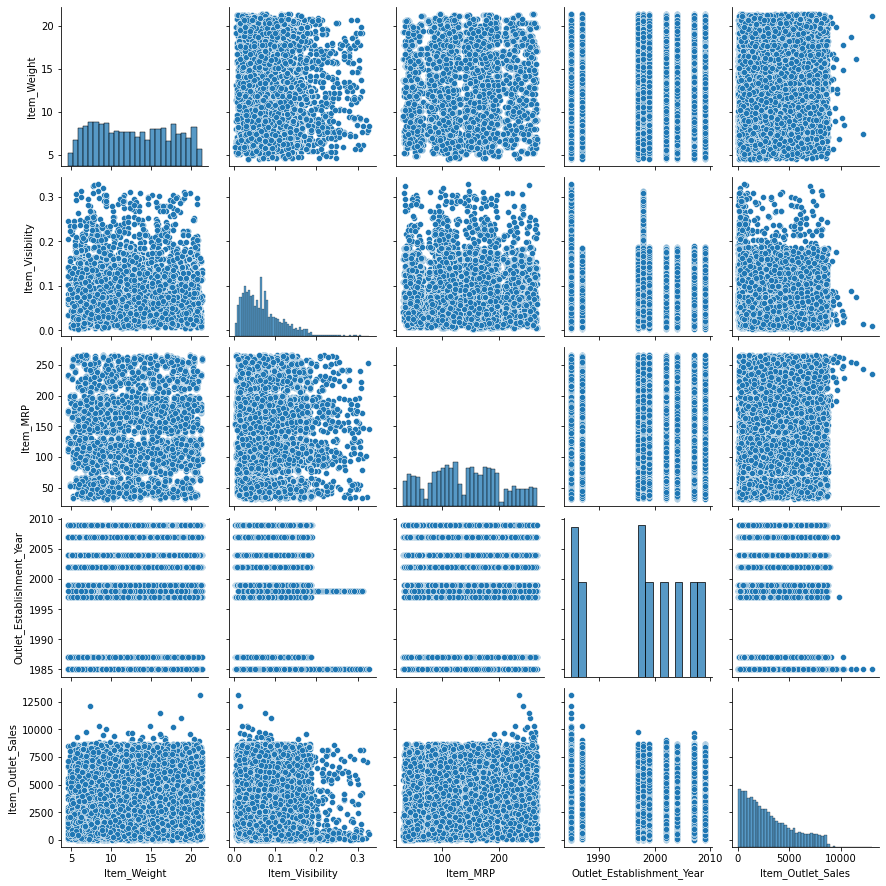

In [18]:
sb.pairplot(df);

In [19]:
df.skew()

Item_Weight                  0.100417
Item_Visibility              1.302807
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            0.738936
dtype: float64

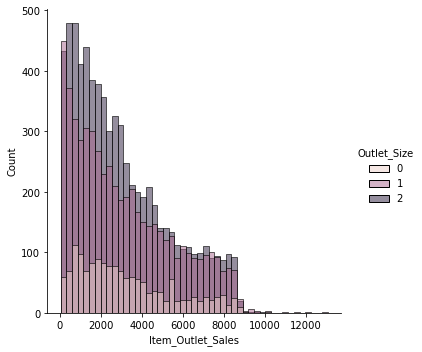

In [95]:
sb.displot(data = df, x = 'Item_Outlet_Sales', hue = 'Outlet_Size');

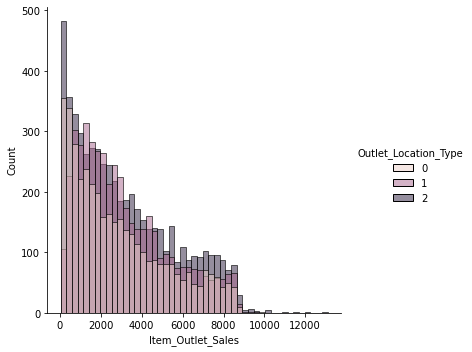

In [94]:
sb.displot(data = df, x = 'Item_Outlet_Sales', hue = 'Outlet_Location_Type');

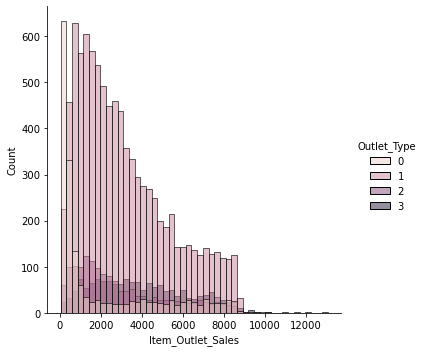

In [93]:
sb.displot(data = df, x = 'Item_Outlet_Sales', hue = 'Outlet_Type');

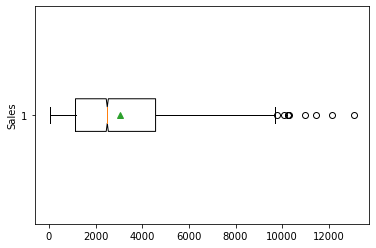

In [21]:
plt.boxplot(df['Item_Outlet_Sales'],notch = True, showmeans = True, vert = False)
plt.ylabel('Sales');

###### 

### Feature Engineering

In [227]:
# Converting non-numeric labeled column into categorical column

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = df[i].astype('category')
    else:
        continue
        
# Using Label Encoder technique to convert categorical column into numerical type
label_encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'category':
        df[i] = label_encoder.fit_transform(df[i])
    else:
        continue
        
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale():
    new_df = df
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_df.to_numpy()), columns = new_df.columns)
    return df_scaled

# scaling the data using MinMax Scaling process
df_scaled = feature_scale()
df_scaled

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,0.149551,0.353974,1.0,0.030546,0.866667,0.467004,0.888889,0.500000,1.0,0.0,0.333333,0.086004
14200,0.197689,0.181304,1.0,0.429216,1.000000,0.585126,0.333333,1.000000,0.5,1.0,0.666667,0.251109
14201,0.915276,0.324204,0.0,0.215364,0.533333,0.371199,0.777778,0.708333,1.0,0.5,0.333333,0.387580
14202,0.334403,0.639774,1.0,0.188211,0.200000,0.778154,0.222222,0.916667,1.0,0.5,0.333333,0.386598


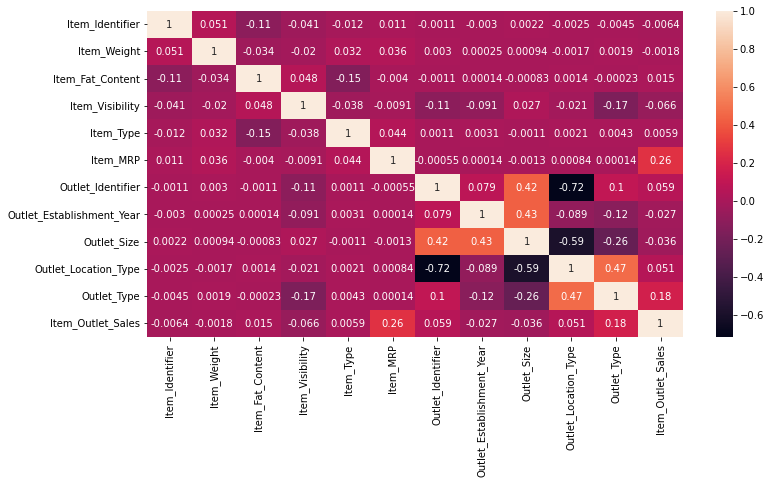

In [23]:
fig, ax = plt.subplots(figsize = (12,6))
sb.heatmap(df_scaled.corr(), annot = True);

In [24]:
df_scaled.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [228]:
df_scaled = df_scaled.drop(['Item_Identifier', 'Item_Weight', 'Item_Type'], axis = 1)
df_scaled

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.0,0.038399,0.927507,1.000000,0.583333,0.5,0.0,0.333333,0.283587
1,1.0,0.048346,0.072068,0.333333,1.000000,0.5,1.0,0.666667,0.031419
2,0.0,0.040593,0.468288,1.000000,0.583333,0.5,0.0,0.333333,0.158115
3,1.0,0.218055,0.640093,0.000000,0.541667,0.5,1.0,0.000000,0.053555
4,0.0,0.186950,0.095805,0.111111,0.083333,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...,...
14199,1.0,0.030546,0.467004,0.888889,0.500000,1.0,0.0,0.333333,0.086004
14200,1.0,0.429216,0.585126,0.333333,1.000000,0.5,1.0,0.666667,0.251109
14201,0.0,0.215364,0.371199,0.777778,0.708333,1.0,0.5,0.333333,0.387580
14202,1.0,0.188211,0.778154,0.222222,0.916667,1.0,0.5,0.333333,0.386598


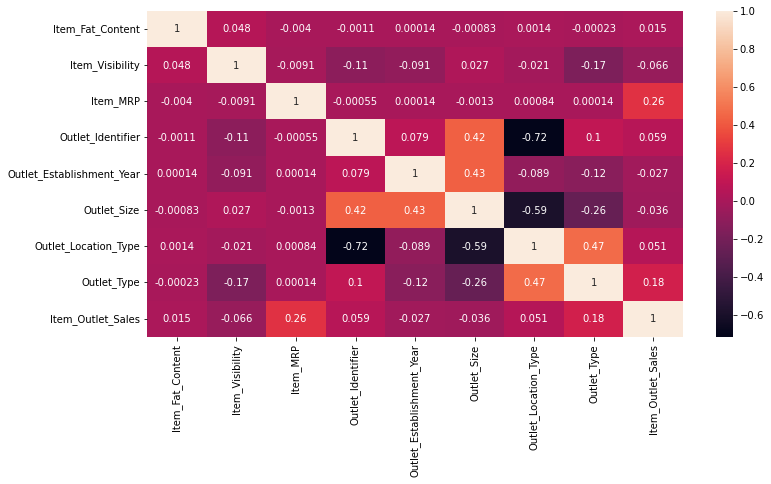

In [26]:
fig, ax = plt.subplots(figsize = (12,6))
sb.heatmap(df_scaled.corr(), annot = True);

###### 

### Univariate regression

### fitting linear regression model

###### Feature selection + splitting data

In [229]:
y = df_scaled['Item_Outlet_Sales'].values
X = np.array(df_scaled['Item_MRP']).reshape((-1,1))

np.random.seed(42)

X_train1, X_test1, y_train1, y_test1  = train_test_split(X, y, test_size = 0.3)

###### model building and evaluating its performance

In [28]:
lr = LinearRegression()
dtr = DecisionTreeRegressor() 
rfr = RandomForestRegressor()
bag = BaggingRegressor(base_estimator = dtr)
l = [lr, dtr, rfr, bag]
name = ['lr', 'dtr', 'rfr', 'bag']
r2_l = []
rmse_l = []

def algo(model):
    model.fit(X_train1, y_train1)
    r_sq = model.score(X_train1, y_train1)
    print('\n (',model,') R-Squared on train dataset = ', r_sq)
    r2_l.append(r_sq)
    
    y_pred = model.predict(X_test1)
    
    explained_variance = metrics.explained_variance_score(y_test1, y_pred)
    print('explained_variance: ', round(explained_variance,4))
    
    mse = metrics.mean_squared_error(y_test1, y_pred)
    rmse = round(np.sqrt(mse),4)
    print('RMSE: ', rmse)
    rmse_l.append(rmse)
    
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train1, y_train1, X_test1, y_test1, 
        loss = 'mse')
    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var)
    
for i in l:
    algo(i)


 ( LinearRegression() ) R-Squared on train dataset =  0.06511828310376588
explained_variance:  0.0708
RMSE:  0.1701
Average expected loss: 0.029
Average bias: 0.029
Average variance: 0.000

 ( DecisionTreeRegressor() ) R-Squared on train dataset =  0.6651777584283924
explained_variance:  -0.6968
RMSE:  0.23
Average expected loss: 0.056
Average bias: 0.042
Average variance: 0.014

 ( RandomForestRegressor() ) R-Squared on train dataset =  0.5826195411858535
explained_variance:  -0.3414
RMSE:  0.2045
Average expected loss: 0.047
Average bias: 0.038
Average variance: 0.009

 ( BaggingRegressor(base_estimator=DecisionTreeRegressor()) ) R-Squared on train dataset =  0.5454625041191514
explained_variance:  -0.3807
RMSE:  0.2075
Average expected loss: 0.048
Average bias: 0.038
Average variance: 0.010


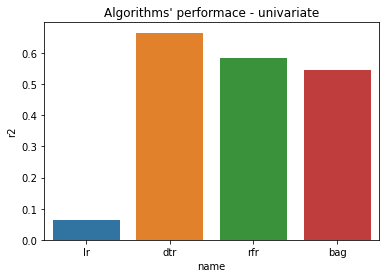

In [29]:
data = pd.DataFrame(list(zip(name, r2_l, rmse_l)), columns = ['name', 'r2', 'rmse'])
sb.barplot(data = data, x = data['name'], y = data['r2'])
plt.title("Algorithms' performace - univariate");

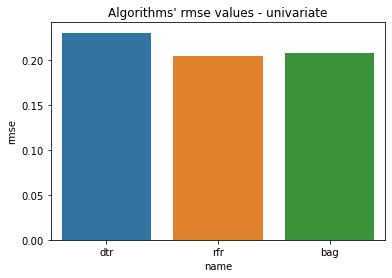

In [30]:
data1 = data[(data.r2 > 0.5) & (data.r2 < 0.95)]
sb.barplot(data = data, x = data1['name'], y = data1['rmse'])
plt.title("Algorithms' rmse values - univariate");

###### 

###### 

### Multiple regression

#### splitting data

In [230]:
df_scaled_1 = df_scaled
y = df_scaled_1.pop('Item_Outlet_Sales')
X = df_scaled_1

X = X.values.reshape(-1, len(X.columns))
y = y.values

X_train1, X_test1, y_train1, y_test1  = train_test_split(X, y, test_size = 0.3)
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train1)

### fitting linear regression model

In [33]:
# svm, adaboost, stack, kmeans is sensitive to noise
lr = LinearRegression()
dtr = DecisionTreeRegressor() 
rfr = RandomForestRegressor()
bag = BaggingRegressor(base_estimator = dtr)
l = [lr, dtr, rfr, bag]
r2_l = []
rmse_l = []
loss = []
bias = []
variance = []

def algo(model):
    model.fit(X_train1, y_train1)
    r_sq = model.score(X_train1, y_train1)
    print('\n (',model,') R-Squared on train dataset = ', r_sq)
    r2_l.append(r_sq)
    
    y_pred = model.predict(X_test1)
    
    explained_variance = metrics.explained_variance_score(y_test1, y_pred)
    print('explained_variance: ', round(explained_variance,4))
    
    mse = metrics.mean_squared_error(y_test1, y_pred)
    rmse = round(np.sqrt(mse),4)
    print('RMSE: ', rmse)
    rmse_l.append(rmse)
    
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train1, y_train1, X_test1, y_test1, 
        loss = 'mse')
    print('Average expected loss: %.3f' % avg_expected_loss)
    loss.append(round(avg_expected_loss, 4))
    print('Average bias: %.3f' % avg_bias)
    bias.append(round(avg_bias, 4))
    print('Average variance: %.3f' % avg_var)
    variance.append(round(avg_var, 4))
    
for i in l:
    algo(i)


 ( LinearRegression() ) R-Squared on train dataset =  0.09831716305855553
explained_variance:  0.1055
RMSE:  0.1691
Average expected loss: 0.029
Average bias: 0.029
Average variance: 0.000

 ( DecisionTreeRegressor() ) R-Squared on train dataset =  1.0
explained_variance:  -0.8211
RMSE:  0.2412
Average expected loss: 0.058
Average bias: 0.032
Average variance: 0.026

 ( RandomForestRegressor() ) R-Squared on train dataset =  0.8594065188053592
explained_variance:  0.01
RMSE:  0.1779
Average expected loss: 0.033
Average bias: 0.030
Average variance: 0.002

 ( BaggingRegressor(base_estimator=DecisionTreeRegressor()) ) R-Squared on train dataset =  0.8175838486377304
explained_variance:  -0.0724
RMSE:  0.1852
Average expected loss: 0.035
Average bias: 0.030
Average variance: 0.005


In [34]:
data = pd.DataFrame(list(zip(name, r2_l, rmse_l, loss, bias, variance)), columns = ['name', 'r2', 'rmse', 'loss', 'bias', 'variance'])
data

,name,r2,rmse,loss,bias,variance
0,lr,0.098317,0.1691,0.0286,0.0286,0.0000
1,dtr,1.000000,0.2412,0.0576,0.0315,0.0261
2,rfr,0.859407,0.1779,0.0329,0.0304,0.0025
3,bag,0.817584,0.1852,0.0351,0.0304,0.0047


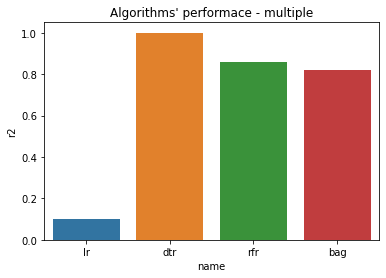

In [35]:
sb.barplot(data = data, x = data['name'], y = data['r2'])
plt.title("Algorithms' performace - multiple");

In [57]:
data1 = data[(data.r2 > 0.5)]
data1

,name,r2,rmse,loss,bias,variance
1,dtr,1.000000,0.2412,0.0576,0.0315,0.0261
2,rfr,0.859407,0.1779,0.0329,0.0304,0.0025
3,bag,0.817584,0.1852,0.0351,0.0304,0.0047


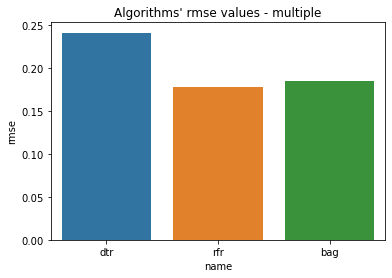

In [58]:
sb.barplot(data = data, x = data1['name'], y = data1['rmse'])
plt.title("Algorithms' rmse values - multiple");

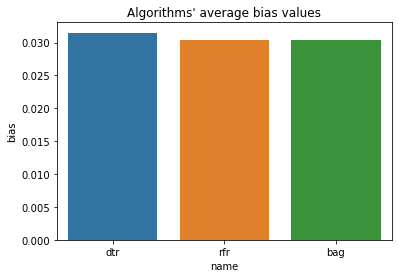

In [59]:
sb.barplot(data = data, x = data1['name'], y = data1['bias'])
plt.title("Algorithms' average bias values");

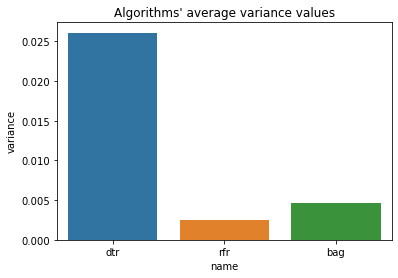

In [60]:
sb.barplot(data = data, x = data1['name'], y = data1['variance'])
plt.title("Algorithms' average variance values");

In [ ]:
rfr = RandomForestRegressor().fit(X_train1, y_train1)
y_pred = rfr.predict(X_test1)

pred_df = pd.DataFrame({'Actual_Value':y_test1, 'Predicted_Value':y_pred, 'Difference':y_test1 - y_pred})

In [ ]:
bag = BaggingRegressor(base_estimator = dtr).fit(X_train1, y_train1)
y_pred = bag.predict(X_test1)

pred_df1 = pd.DataFrame({'Actual_Value':y_test1, 'Predicted_Value':y_pred, 'Difference':y_test1 - y_pred})

In [68]:
pred_df

,Actual_Value,Predicted_Value,Difference
0,0.080325,0.619005,-0.538680
1,0.302203,0.005788,0.296415
2,0.038764,0.284204,-0.245440
3,0.179968,0.126900,0.053068
4,0.041169,0.473018,-0.431849
...,...,...,...
4257,0.204478,0.391615,-0.187137
4258,0.270937,0.270937,0.000000
4259,0.423034,0.508314,-0.085280
4260,0.450917,0.014179,0.436738


In [64]:
pred_df1

,Actual_Value,Predicted_Value,Difference
0,0.080325,0.447425,-0.367100
1,0.302203,0.285932,0.016271
2,0.038764,0.240784,-0.202020
3,0.179968,0.225225,-0.045257
4,0.041169,0.364227,-0.323058
...,...,...,...
4257,0.204478,0.346380,-0.141902
4258,0.270937,0.312339,-0.041402
4259,0.423034,0.453363,-0.030330
4260,0.450917,0.124433,0.326485


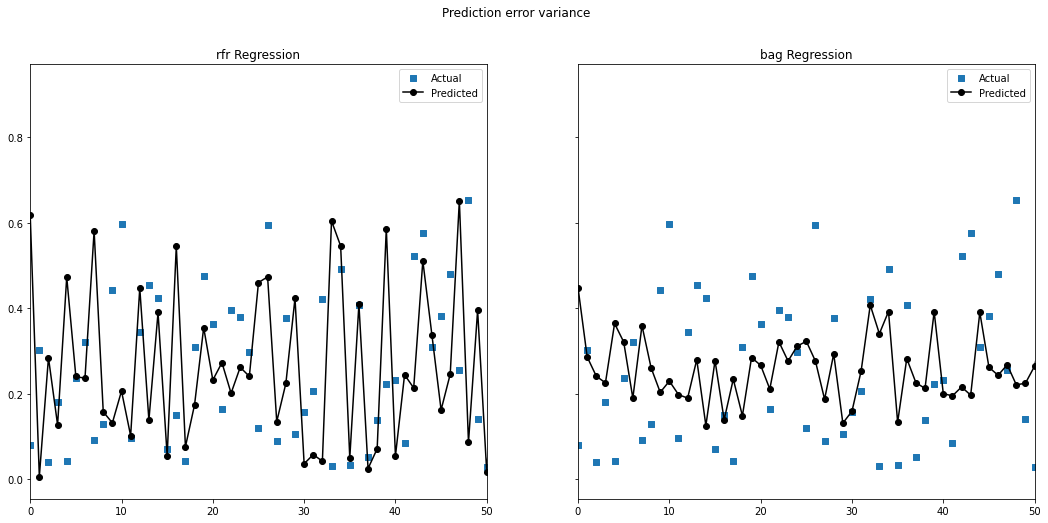

In [82]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (18,8), sharey = True, sharex = True)

ax1.scatter(range(len(pred_df['Difference'])), pred_df['Actual_Value'], marker="s")
ax1.plot(range(len(pred_df['Difference'])), pred_df['Predicted_Value'], color = 'black', marker="o")
ax1.set_title('rfr Regression')
ax1.set_xlim([0,50])
ax1.legend(['Actual', 'Predicted'])

ax2.scatter(range(len(pred_df1['Difference'])), pred_df1['Actual_Value'], marker="s")
ax2.plot(range(len(pred_df1['Difference'])), pred_df1['Predicted_Value'], color = 'black', marker="o")
ax2.set_title('bag Regression')
ax2.set_xlim([0,50])
ax2.legend(['Actual', 'Predicted'])

plt.suptitle('Prediction error variance');

In [231]:
l = [1,2,3,4,5]
for i in l:
    rfe = RFE(estimator = RandomForestRegressor(), n_features_to_select = i)
    model = RandomForestRegressor()
    pipeline = Pipeline(steps=[('s',rfe),('m',model)])
    pipeline.fit(X_train1, y_train1)
    r_sq = pipeline.score(X_train1, y_train1)
    print('\n (',model,') R-Squared on train dataset = ', r_sq)


 ( RandomForestRegressor() ) R-Squared on train dataset =  0.5901850509114006

 ( RandomForestRegressor() ) R-Squared on train dataset =  0.8447084871695973

 ( RandomForestRegressor() ) R-Squared on train dataset =  0.8541637737046203

 ( RandomForestRegressor() ) R-Squared on train dataset =  0.8583311384806298

 ( RandomForestRegressor() ) R-Squared on train dataset =  0.858940928422585


In [114]:
l2 = [0.5891408156391061, 0.8423720382472644, 0.842263008532153, 0.8416474160463162, 0.8557484468795776]
d = pd.DataFrame(list(zip(l,l2)), columns = ['nof', 'r2'])
d

,nof,r2
0,1,0.589141
1,2,0.842372
2,3,0.842263
3,4,0.841647
4,5,0.855748


In [232]:
rfe = RFE(estimator = RandomForestRegressor(), n_features_to_select = 5)
model = RandomForestRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X_train1, y_train1)
r_sq = pipeline.score(X_train1, y_train1)

### Conclusion: With max features = 5, RandomForestRegressor is the best model for the given dataset as it gives best r2 value, least variance and bias among all the regressor models.

### Business Insights: 
    Items can be placed at such locations that can be in more visibility

    Item MRP price can be taken into consideration according to the location type

    Healthy Items can be stored more if health issues are higher (can be based on year too)

    Sales can be increased on the basis of outlet type, depending on locality


###### 

## Extras

In [66]:
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel = kernel).fit(X_train1, y_train1)
gpr.score(X_train1, y_train1)

0.0983160482667963

In [72]:
svr = SVR().fit(X_train1, y_train1)
svr.score(X_train1, y_train1)

0.11823543665538061

In [ ]:
y_pred = gpr.predict(X_test1)

fig, ax = plt.subplots(1, 1, figsize = (15,4)) # rows = 1, columns = 1

ax.scatter(range(len(y_test1)), y_test1, marker="s")
ax.plot(range(len(y_pred)), y_pred, color = 'black', marker="o")
ax.set_title('Gaussian Regression')
ax.set_xlim([0,100])

In [69]:
gpr_MSE = mean_squared_error(y_test1, y_pred)
gpr_RMSE = mean_squared_error(y_test1, y_pred, squared = False)
print("\nMSE value : ", gpr_MSE, "\n\nRMSE value : ",  gpr_RMSE)


MSE value :  0.02858122460037723 

RMSE value :  0.1690598255067632


(0.0, 100.0)

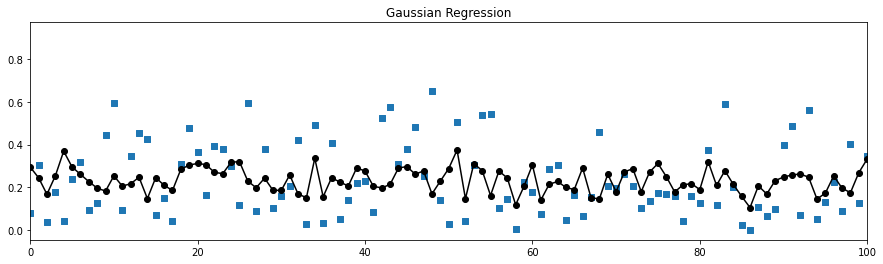

In [70]:
fig, ax = plt.subplots(1, 1, figsize = (15,4)) # rows = 1, columns = 1

ax.scatter(range(len(y_test1)), y_test1, marker="s")
ax.plot(range(len(y_pred)), y_pred, color = 'black', marker="o")
ax.set_title('Gaussian Regression')
ax.set_xlim([0,100])

(0.0, 100.0)

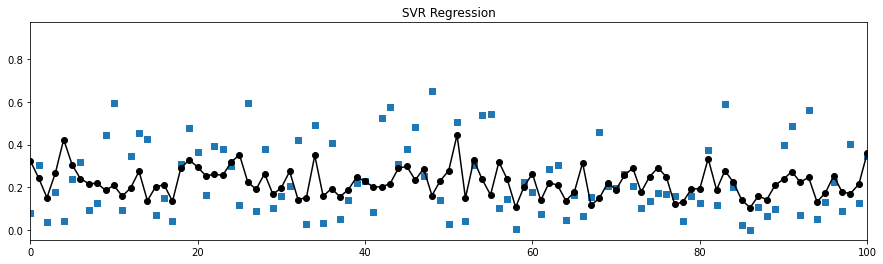

In [98]:
y_pred = svr.predict(X_test1)

fig, ax = plt.subplots(1, 1, figsize = (15,4)) # rows = 1, columns = 1

ax.scatter(range(len(y_test1)), y_test1, marker="s")
ax.plot(range(len(y_pred)), y_pred, color = 'black', marker="o")
ax.set_title('SVR Regression')
ax.set_xlim([0,100])